In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from random import randint

In [7]:
def change_class(x):
    if "Botnet" in x:
        return 1
    elif "Normal" in x:
        return 0 

In [54]:
ctu_13 = pd.read_csv("../Datasets/ctu13/ctu13subs10.csv")

In [55]:
ctu_13["class"] = ctu_13["class"].apply(change_class)

In [57]:
#FEATURE VECTOR
#Periodicity
ctu_13["strong_p"] = ctu_13["State"].str.count('[a-i]')
ctu_13["weak_p"] = ctu_13["State"].str.count('[A-I]')
ctu_13["weak_np"] = ctu_13["State"].str.count('[r-z]')
ctu_13["strong_np"] = ctu_13["State"].str.count('[R-Z]')
#Duration
ctu_13["duration_s"] = ctu_13["State"].str.count('(a|A|r|R|1|d|D|u|U|4|g|G|x|X|7)')
ctu_13["duration_m"] = ctu_13["State"].str.count('(b|B|s|S|2|e|E|v|V|5|h|H|y|Y|8)')
ctu_13["duration_l"] = ctu_13["State"].str.count('(c|C|t|T|3|f|F|w|W|6|i|I|z|Z|9)')
#Size
ctu_13["size_s"] = ctu_13["State"].str.count('[a-c]') + \
                    ctu_13["State"].str.count('[A-C]') + \
                    ctu_13["State"].str.count('[r-t]') + \
                    ctu_13["State"].str.count('[R-T]') + \
                    ctu_13["State"].str.count('[1-3]')
ctu_13["size_m"] = ctu_13["State"].str.count('[d-f]') + \
                    ctu_13["State"].str.count('[D-F]') + \
                    ctu_13["State"].str.count('[u-w]') + \
                    ctu_13["State"].str.count('[U-W]') + \
                    ctu_13["State"].str.count('[4-6]')
ctu_13["size_l"] = ctu_13["State"].str.count('[g-i]') + \
                    ctu_13["State"].str.count('[G-I]') + \
                    ctu_13["State"].str.count('[x-z]') + \
                    ctu_13["State"].str.count('[X-Z]') + \
                    ctu_13["State"].str.count('[7-9]')
#Periodicity %
ctu_13["strong_p"] = ctu_13["strong_p"]/ctu_13["modelsize"]
ctu_13["weak_p"] = ctu_13["weak_p"]/ctu_13["modelsize"]
ctu_13["strong_np"] = ctu_13["strong_np"]/ctu_13["modelsize"]
ctu_13["weak_np"] = ctu_13["weak_np"]/ctu_13["modelsize"]
#Duration %
ctu_13["duration_s"] = ctu_13["duration_s"]/ctu_13["modelsize"]
ctu_13["duration_m"] = ctu_13["duration_m"]/ctu_13["modelsize"]
ctu_13["duration_l"] = ctu_13["duration_l"]/ctu_13["modelsize"]
#Size %
ctu_13["size_s"] = ctu_13["size_s"]/ctu_13["modelsize"]
ctu_13["size_m"] = ctu_13["size_m"]/ctu_13["modelsize"]
ctu_13["size_l"] = ctu_13["size_l"]/ctu_13["modelsize"]

In [22]:
ctu_13_or = pd.read_csv("../Datasets/ctu-13.labeled.cleaned.csv")

In [56]:
ctu_13["modelsize"] = ctu_13_or["modelsize"]

In [58]:
ctu_13.head()

,State,class,modelsize,strong_p,weak_p,weak_np,strong_np,duration_s,duration_m,duration_l,size_s,size_m,size_l
0,I0I*z*Z0I0,0,13,0.0,0.230769,0.076923,0.076923,0.000000,0.0,0.384615,0.00000,0.000000,0.384615
1,"+U.R,R.r.R.",0,4879,0.0,0.000000,0.000205,0.000820,0.001025,0.0,0.000000,0.00082,0.000205,0.000000
2,F.,0,5,0.0,0.200000,0.000000,0.000000,0.000000,0.0,0.200000,0.00000,0.200000,0.000000
3,.F.Z.Z.z.Z.,0,41,0.0,0.024390,0.024390,0.073171,0.000000,0.0,0.121951,0.00000,0.024390,0.097561
4,Z.z.Z.I.Z+,0,13,0.0,0.076923,0.076923,0.230769,0.000000,0.0,0.384615,0.00000,0.000000,0.384615


In [59]:
ctu_13.drop(["modelsize","State"], axis=1, inplace=True)

In [60]:
#Divide train-test dataset
x = ctu_13.drop('class',axis=1)
y = ctu_13['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [61]:
for i in range(10):
    #Training
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)

    #Testing
    rfc_pred = rfc.predict(X_test)
    print(confusion_matrix(y_test,rfc_pred))
    print(classification_report(y_test,rfc_pred))

    report = classification_report(y_test,rfc_pred,
                target_names=["normal","botnet"], digits=4, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df.iloc[[0,1]].to_csv("../Datasets/test_rf_10_Harpo.csv",index=False, mode="a", header=False)

[[ 695  140]
 [ 149 1736]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       835
           1       0.93      0.92      0.92      1885

    accuracy                           0.89      2720
   macro avg       0.87      0.88      0.88      2720
weighted avg       0.89      0.89      0.89      2720

[[ 690  145]
 [ 149 1736]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       835
           1       0.92      0.92      0.92      1885

    accuracy                           0.89      2720
   macro avg       0.87      0.87      0.87      2720
weighted avg       0.89      0.89      0.89      2720

[[ 696  139]
 [ 144 1741]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       835
           1       0.93      0.92      0.92      1885

    accuracy                           0.90      2720
   macro avg       0.88      0.88      0.88    

In [62]:
df = pd.read_csv("../Datasets/test_rf_10_Harpo.csv")

In [66]:
df.head()

,F1,Precision,Recall,Specificity
0,0.827874,0.823460,0.832335,NaN
1,0.923159,0.925373,0.920955,0.832335
2,0.824373,0.822408,0.826347,NaN
3,0.921933,0.922913,0.920955,0.826347
4,0.831045,0.828571,0.833533,NaN


In [64]:
df.drop("Support", axis=1, inplace=True)

In [65]:
df["Specificity"] = df.iloc[0::2]["Recall"]
df["Specificity"] = df["Specificity"].shift(1)

In [39]:
df75 = df.iloc[1::2]
df75.head() 

,F1,Precision,Recall,Specificity
1,0.935620,0.940584,0.930709,0.862577
3,0.933649,0.936609,0.930709,0.852761
5,0.935645,0.936383,0.934908,0.851534
7,0.934491,0.936709,0.932283,0.852761
9,0.933789,0.934771,0.932808,0.847853


In [53]:
df25 = df.iloc[1::2]
df25.head() 

,F1,Precision,Recall,Specificity
1,0.926486,0.914621,0.938664,0.821029
3,0.931589,0.927292,0.935926,0.850112
5,0.927757,0.920259,0.935378,0.834452
7,0.930283,0.925244,0.935378,0.845638
9,0.927560,0.922535,0.932640,0.840045


In [67]:
df10 = df.iloc[1::2]
df10.head() 

,F1,Precision,Recall,Specificity
1,0.923159,0.925373,0.920955,0.832335
3,0.921933,0.922913,0.920955,0.826347
5,0.924834,0.926064,0.923607,0.833533
7,0.924347,0.928304,0.920424,0.839521
9,0.922423,0.923896,0.920955,0.828743


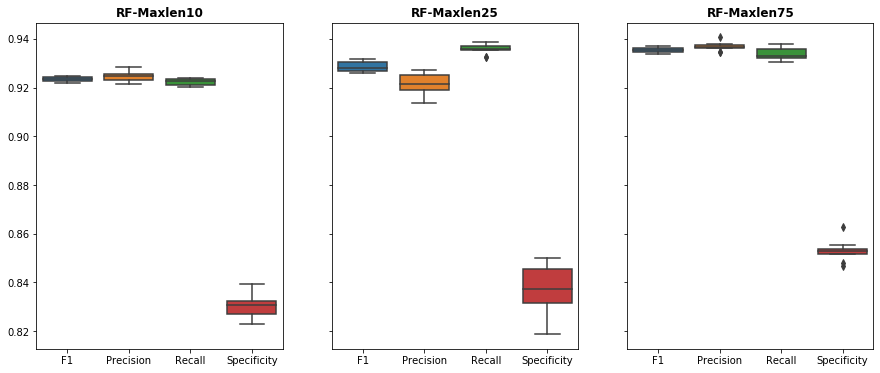

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15,6), sharey=True)
sns.boxplot(data=df10.iloc[:,0:4], ax=axes[0])
sns.boxplot(data=df25.iloc[:,0:4], ax=axes[1])
sns.boxplot(data=df75.iloc[:,0:4], ax=axes[2])
axes[0].set_title('RF-Maxlen10',fontweight="bold")
axes[1].set_title('RF-Maxlen25',fontweight="bold")
axes[2].set_title('RF-Maxlen75',fontweight="bold")
plt.savefig("rf_harpo.jpg")

In [1]:
### Para la red

In [19]:
ctu_13 = pd.read_csv("../Datasets/ctu13/ctu13subs75.csv")

In [23]:
ctu_13.head()

,domain,class
0,I0I*z*Z0I0,0
1,"R,U.R,U.U.U.R.R.d.R*R.R.U.R,R.u.R.R.D.r.R.U.U....",0
2,F.,0
3,Z.z.W.W.Z.Z.I.Z.Z.Z.Z.Z+W.F.Z.Z.z.Z.z.,0
4,Z.z.Z.I.Z+,0


In [21]:
ctu_13["class"] = ctu_13["class"].apply(change_class)

In [22]:
ctu_13.rename(columns={"State":"domain"}, inplace=True)

In [24]:
ctu_13.to_csv("../Datasets/ctu13/ctu13subs75_net.csv", index=False)

In [98]:
df = pd.read_csv("../Datasets/ctu13/test_10.csv")

In [99]:
df.head(7)

,F1,Precision,Recall,Support
0,0.836017,0.724165,0.988734,1864.0
1,0.259980,0.858108,0.153197,829.0
2,0.836207,0.724450,0.988734,1864.0
3,0.261759,0.859060,0.154403,829.0
4,0.836586,0.725020,0.988734,1864.0
5,0.265306,0.860927,0.156815,829.0
6,0.836207,0.724450,0.988734,1864.0


In [100]:
df.drop("Support", axis=1, inplace=True)

In [101]:
df["Specificity"] = df.iloc[1::2]["Recall"]
df["Specificity"] = df["Specificity"].shift(-1)

In [102]:
df10 = df.iloc[0::2]
df10.head() 

,F1,Precision,Recall,Specificity
0,0.836017,0.724165,0.988734,0.153197
2,0.836207,0.724450,0.988734,0.154403
4,0.836586,0.725020,0.988734,0.156815
6,0.836207,0.724450,0.988734,0.154403
8,0.836776,0.725305,0.988734,0.158022


In [82]:
df10["FPR"] = 1-df10["Specificity"]
df10.drop("Specificity", axis=1, inplace=True)

In [53]:
df25 = df.iloc[0::2]
df25.head()

,F1,Precision,Recall,Specificity
0,0.877587,0.819748,0.944206,0.533172
2,0.873937,0.841191,0.909335,0.613993
4,0.875734,0.835036,0.920601,0.591074
6,0.876147,0.834466,0.922210,0.588661
8,0.876740,0.829899,0.929185,0.571773


In [90]:
df75 = df.iloc[0::2]
df75.head() 

,F1,Precision,Recall,Specificity
0,0.929012,0.927769,0.930258,0.837153
2,0.909966,0.963429,0.862124,0.926417
4,0.902029,0.981084,0.834764,0.963812
6,0.917970,0.939360,0.897532,0.869723
8,0.919418,0.960819,0.881438,0.919180


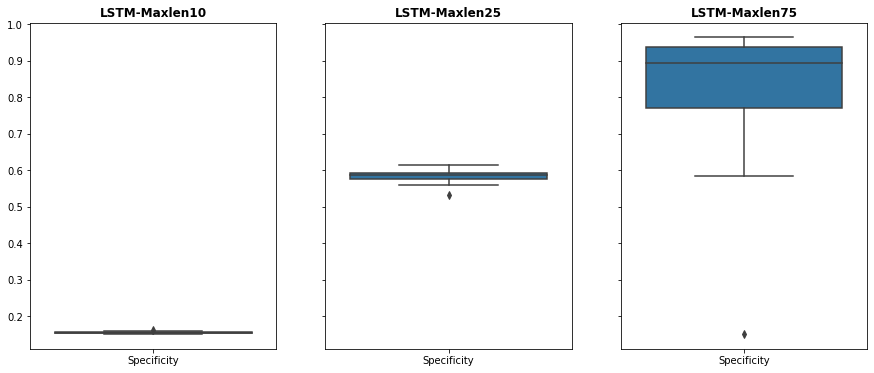

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(15,6), sharey=True)
sns.boxplot(data=df10.iloc[:,3:4], ax=axes[0])
sns.boxplot(data=df25.iloc[:,3:4], ax=axes[1])
sns.boxplot(data=df75.iloc[:,3:4], ax=axes[2])
axes[0].set_title('LSTM-Maxlen10',fontweight="bold")
axes[1].set_title('LSTM-Maxlen25',fontweight="bold")
axes[2].set_title('LSTM-Maxlen75',fontweight="bold")
plt.savefig("rf_harpo_lstm_fpr.jpg")